In [1]:
#importo librerias que voy a implementar
%matplotlib 
import numpy as np
# para cálculos algebraicos
import matplotlib.pyplot as plt
#para realizar gráficos
import pandas as pd
#para display en cuadros
import CoolProp.CoolProp as cp
#para disponer de las propiedades de los fluidos en cuestión
import ht
import fluids
from IPython.display import Latex

Using matplotlib backend: Qt5Agg


In [2]:
# Propiedades físicas del aire 
# Busco determinar Reynolds de la experiencia de Eiffel

h=15 /100 #m
P=101325 #pa
T=15 + 273 #K
U_aire =10 #m/s

rho_aire=cp.PropsSI("D","T",T,"P",P,"air")
#aclaración ellos toman rho = 1.225 

mu_aire=cp.PropsSI("V","T",T,"P",P,"air")

nu_aire=mu_aire/rho_aire #m2/s
Re= U_aire*h/nu_aire

print("Número de Reynolds utilizado por Eiffel Re= ", Re)



#Propiedades del agua
rho_agua=cp.PropsSI("D","T",T,"P",P,"water")

mu_agua=cp.PropsSI("V","T",T,"P",P,"water")

nu_agua=mu_agua/rho_agua #m2/s



Número de Reynolds utilizado por Eiffel Re=  102442.34185204051


In [3]:
#DATOS CONSTRUCTIVOS

L=0.3 #m
aspect_ratio=[1,1.5,2]

Areas=[0.33**2]
Long_h=[0.33]


for a in aspect_ratio[1:]:
    h=L/a
    Area=L*h
    Areas.append(Area)
    Long_h.append(h)
    
d={"Placas":["33x33","30x20","30x15"],"Aspect Ratio [h/L]":aspect_ratio,"Area [m2]":Areas}
df=pd.DataFrame(data=d)
df


,Placas,Aspect Ratio [h/L],Area [m2]
0,33x33,1.0,0.1089
1,30x20,1.5,0.0600
2,30x15,2.0,0.0450


## Placa 30x20: Estimación de Fuerza

In [4]:
#FUERZA ESTIMADA PlACA 30x20


u_exp=[0.2,0.3,0.4,0.5,0.6] #m/s
Cd=1.28
rho=1000 #kg/m3

Reynolds=[]
F_estimada=[]
for u in u_exp:
    Re=u*Long_h[1]/nu_agua
    Reynolds.append(Re)
    F=1/2*rho_agua*u**2*Areas[1]*Cd/9.8 #kg
    F_estimada.append(F)
    
#F_estimada=['%.3f' % elem for elem in F_estimada]
Reynolds=['%.0f' % elem for elem in Reynolds]

d={"Velocidades experimentales":u_exp,"Reynolds":Reynolds, "Fuerza estimada [kg]":F_estimada}
df=pd.DataFrame(data=d)
df



,Velocidades experimentales,Reynolds,Fuerza estimada [kg]
0,0.2,34993,0.156598
1,0.3,52489,0.352345
2,0.4,69985,0.626390
3,0.5,87481,0.978735
4,0.6,104978,1.409378


## Fuerza sensor: Equilibrio de Momentos

$$\sum M^{o} = 0$$

$$F_{drag} \times 1901\:mm - F_{sensor} \times 177.67\: mm = 0$$

$$ F_{sensor} = 10.7 \times F_{drag}$$ 

In [5]:
#PASAJE A FUERZA SENSOR

Amp= 1901/177.67  #Factor de amplificación de fuerza 

F_sensor=[]

for F in F_estimada:
    F_s= Amp * F
    F_sensor.append(F_s)

F_sensor=['%.2f' % elem for elem in F_sensor]
F_estimada=['%.3f' % elem for elem in F_estimada]

d={"Velocidades experimentales":u_exp,"Reynolds":Reynolds, "Fuerza estimada [kg]":F_estimada, "Fuerza Sensor":F_sensor}
df=pd.DataFrame(data=d)
print("DATOS PARA PLACA 30X20")
df

DATOS PARA PLACA 30X20


,Velocidades experimentales,Reynolds,Fuerza estimada [kg],Fuerza Sensor
0,0.2,34993,0.157,1.68
1,0.3,52489,0.352,3.77
2,0.4,69985,0.626,6.70
3,0.5,87481,0.979,10.47
4,0.6,104978,1.409,15.08


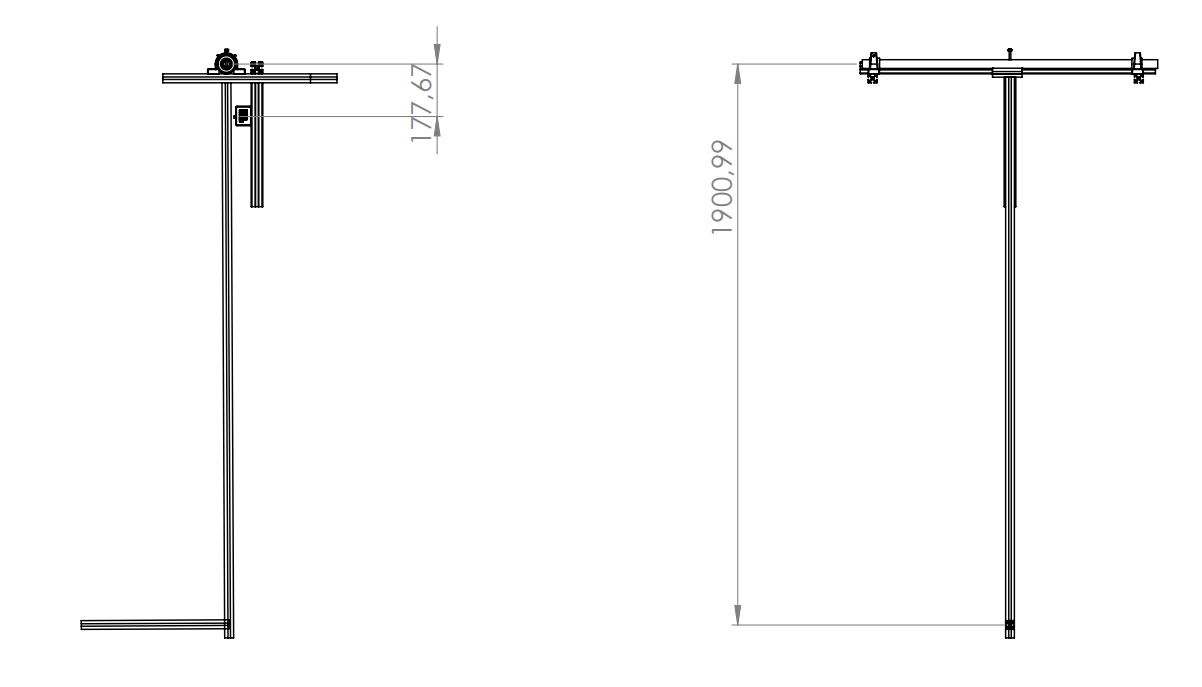

In [6]:
from IPython.display import Image
Image(filename=r"C:\Users\Lucas\Desktop\FIUBA\67.00 TESIS GIT\3D setup_Model\Torques.png")